In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
print(os.listdir("../data/raw"))

['.gitkeep', 'members_v3.csv', 'sample_submission_v2.csv', 'sample_submission_zero.csv', 'train.csv', 'train_v2.csv', 'transactions.csv', 'transactions_v2.csv', 'user_label_201703.csv', 'user_logs.csv', 'user_logs_v2.csv']


In [3]:
import collections

In [4]:
train = pd.read_csv('../data/raw/train_v2.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   msno      970960 non-null  object
 1   is_churn  970960 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 14.8+ MB


In [5]:
train['is_churn'].value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

In [6]:
members = pd.read_csv('../data/raw/members_v3.csv', parse_dates=['registration_init_time'])
train_member = pd.merge(train,members, on ='msno',how='left')


In [7]:
train_member.isnull().sum()

msno                           0
is_churn                       0
city                      109993
bd                        109993
gender                    582055
registered_via            109993
registration_init_time    109993
dtype: int64

In [8]:
train_member.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   msno                    970960 non-null  object        
 1   is_churn                970960 non-null  int64         
 2   city                    860967 non-null  float64       
 3   bd                      860967 non-null  float64       
 4   gender                  388905 non-null  object        
 5   registered_via          860967 non-null  float64       
 6   registration_init_time  860967 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 59.3+ MB


In [9]:
train_member.describe()

,is_churn,city,bd,registered_via
count,970960.000000,860967.000000,860967.000000,860967.000000
mean,0.089942,5.937295,13.583854,6.892744
std,0.286099,6.441203,20.064040,1.937794
min,0.000000,1.000000,-3152.000000,3.000000
25%,0.000000,1.000000,0.000000,7.000000
50%,0.000000,1.000000,0.000000,7.000000
75%,0.000000,13.000000,27.000000,9.000000
max,1.000000,22.000000,2016.000000,13.000000


In [10]:
train_member['registration_init_time'].median()

Timestamp('2014-06-02 00:00:00')

In [11]:
train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,male,3.0,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,male,3.0,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,male,3.0,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,female,7.0,2014-01-25


In [12]:

gender = {'male':1, 'female':2}
train_member['gender'] = train_member['gender'].map(gender)

train_member.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.0,28.0,1.0,3.0,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.0,20.0,1.0,3.0,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.0,18.0,1.0,3.0,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.0,0.0,NaN,7.0,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.0,35.0,2.0,7.0,2014-01-25


In [16]:

train_member['gender'].fillna(0,inplace=True)


In [17]:

train_member['gender'].head()

0    1.0
1    1.0
2    1.0
3    0.0
4    2.0
Name: gender, dtype: float64

observation -
Many null values - 109993, gender is missing lots of value, city as float, bd - mixed range(year, age,-ve),reg_time -float.

change - bd to common age ,change reg_time to to_date

In [18]:
train_member[train_member.bd > 1923]

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
217142,zEV2f5hxpJ1UA0Siy0XDC3vgqamDW0neVQXS7d1p/pE=,0,4.0,2016.0,0.0,9.0,2015-03-14
641878,G8zP9tlnj+jjfjoT40ofzqghqQO4Ga5VGHBpzpJUKbs=,0,3.0,1970.0,2.0,3.0,2015-02-09


In [19]:
# 2023 - 2016.0 
train_member.at[217142,'bd'] = 7
# 2023 - 1970.0 
train_member.at[641878,'bd'] = 53

In [20]:

train_member.iloc[[217142,641878]] 


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
217142,zEV2f5hxpJ1UA0Siy0XDC3vgqamDW0neVQXS7d1p/pE=,0,4.0,7.0,0.0,9.0,2015-03-14
641878,G8zP9tlnj+jjfjoT40ofzqghqQO4Ga5VGHBpzpJUKbs=,0,3.0,53.0,2.0,3.0,2015-02-09


In [21]:
train_member['bd'].describe()

count    860967.000000
mean         13.579294
std          19.835945
min       -3152.000000
25%           0.000000
50%           0.000000
75%          27.000000
max        1820.000000
Name: bd, dtype: float64

In [22]:
q1 = train_member['bd'].quantile(0.25)
q2 = train_member['bd'].quantile(0.75)
IQR = q2-q1
print(q1-1.5*IQR,q2+1.5*IQR)


-40.5 67.5


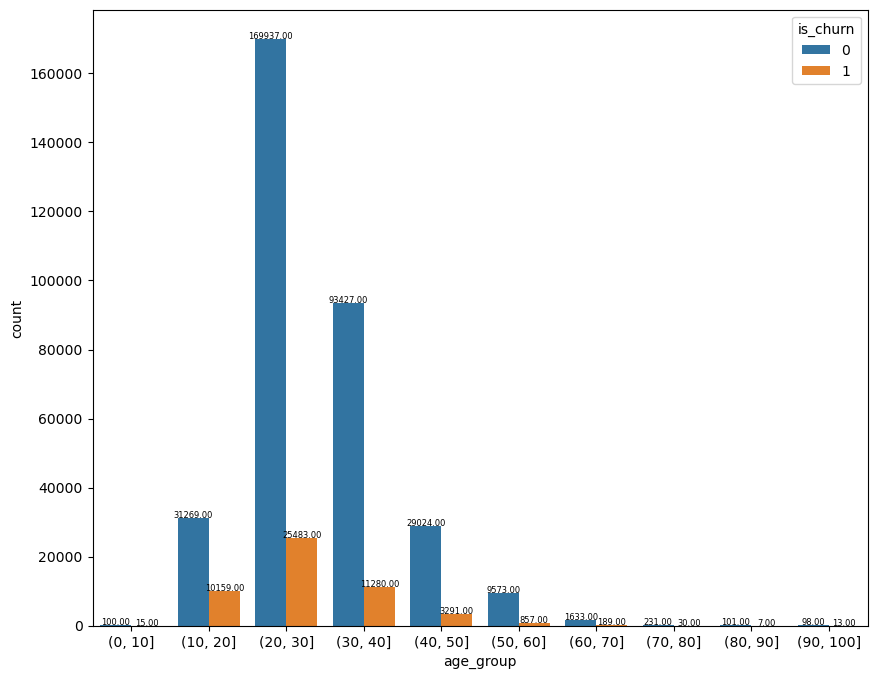

In [17]:
train_member['age_group'] = pd.cut(train_member.bd, bins=[0,10,20,30,40,50,60,70,80,90,100],right=True)
plt.figure(figsize=(10, 8))
plots = sns.countplot(x='age_group', data=train_member, hue='is_churn')
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=6, xytext=(0, 2),
                   textcoords='offset points')
plt.show()

max listen in the age group 20-30. the outlier less than 0 and greater than 100 are removed. 75%  is 27 age. impute 27 for outliers

In [23]:
train_member['bd'] = train_member['bd'].apply(lambda x: x if(x<=100.0) and (x>0) else np.nan)
train_member['bd'] = train_member['bd'].fillna(27)

In [24]:
train_member['registered_year'] = train_member['registration_init_time'].dt.year

In [25]:
train_member['registered_year'].head()

0    2013.0
1    2013.0
2    2013.0
3    2014.0
4    2014.0
Name: registered_year, dtype: float64

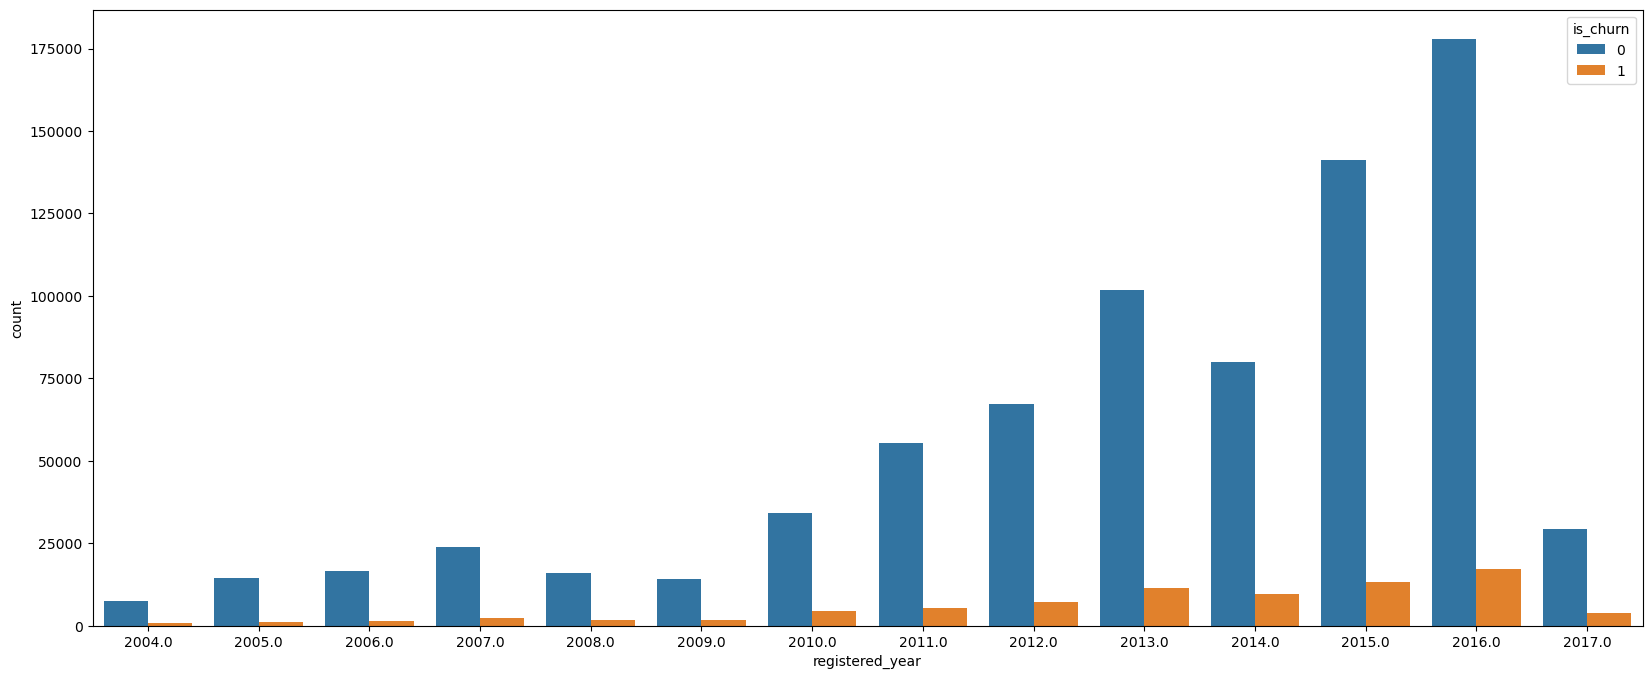

In [27]:
plt.figure(figsize=(20, 8))
sns.countplot(x='registered_year', data=train_member, hue='is_churn')
plt.show()

2016 has many registered user

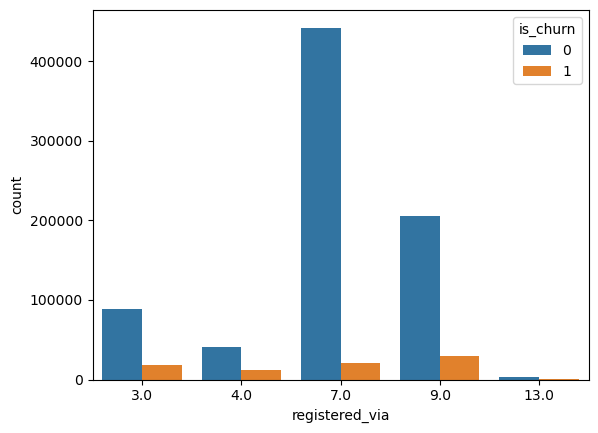

In [19]:
sns.countplot(x='registered_via', data=train_member, hue='is_churn')
plt.show()

7 method type is used more for registered_via

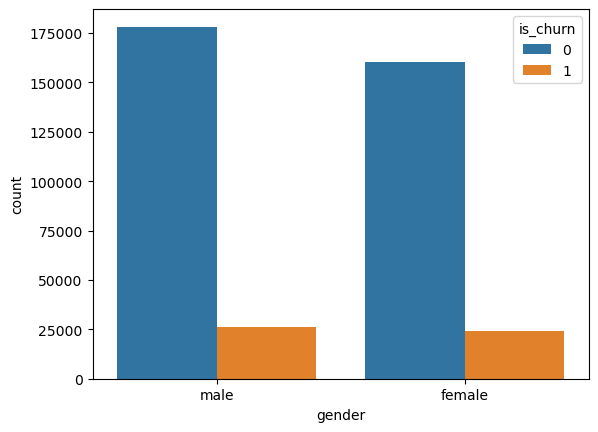

In [20]:
sns.countplot(x='gender', data=train_member, hue='is_churn')
plt.show()

male and female are equally contributed

Reduce size using reduction in datatype size

In [37]:
def reducedatatype(df):
    int_col = list(df.select_dtypes(include=[int]).columns)
    for col in int_col:
        if((np.min(df[col]) >= -127) and (np.max(df[col]) <= 127)):
            df[col] = df[col].astype(np.int8)
        elif((np.min(df[col]) >= -32768) and (np.max(df[col]) <= 32768)):
            df[col] = df[col].astype(np.int16)
        elif((np.min(df[col]) >= -2147483647) and (np.max(df[col]) <= 2147483647)):
            df[col] = df[col].astype(np.int32)
        else:
            df[col] = df[col].astype(np.int64)
    int_float = list(df.select_dtypes(include=[float]).columns)
    for col in int_float:
        df[col] = df[col].astype(np.float32)

           

In [22]:
reducedatatype(train_member)

In [29]:
train_member.dropna(inplace=True)

In [30]:
train_member.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
registered_year           0
dtype: int64

In [32]:
train_member.to_csv('../data/processed/train_member.csv',index=False)

In [35]:
trans = pd.read_csv('../data/raw/transactions.csv')
trans1 = pd.read_csv('../data/raw/transactions_v2.csv')

In [36]:
trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [38]:

reducedatatype(trans)

reducedatatype(trans1)

In [39]:
trans1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1431009 entries, 0 to 1431008
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype 
---  ------                  --------------    ----- 
 0   msno                    1431009 non-null  object
 1   payment_method_id       1431009 non-null  int8  
 2   payment_plan_days       1431009 non-null  int16 
 3   plan_list_price         1431009 non-null  int16 
 4   actual_amount_paid      1431009 non-null  int16 
 5   is_auto_renew           1431009 non-null  int8  
 6   transaction_date        1431009 non-null  int32 
 7   membership_expire_date  1431009 non-null  int32 
 8   is_cancel               1431009 non-null  int8  
dtypes: int16(3), int32(2), int8(3), object(1)
memory usage: 34.1+ MB


In [40]:
trans.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0


In [41]:
trans_merge = pd.concat([trans,trans1],ignore_index=True)

In [42]:
trans_merge.to_csv('../data/processed/transaction_merged.csv',index=False)

In [43]:
transaction=pd.read_csv('../data/processed/transaction_merged.csv',parse_dates=['transaction_date','membership_expire_date'])





In [44]:
transaction=transaction.drop_duplicates()


In [45]:
reducedatatype(transaction)


In [46]:
transaction.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22975416 entries, 0 to 22978754
Data columns (total 9 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   msno                    object        
 1   payment_method_id       int8          
 2   payment_plan_days       int16         
 3   plan_list_price         int16         
 4   actual_amount_paid      int16         
 5   is_auto_renew           int8          
 6   transaction_date        datetime64[ns]
 7   membership_expire_date  datetime64[ns]
 8   is_cancel               int8          
dtypes: datetime64[ns](2), int16(3), int8(3), object(1)
memory usage: 898.4+ MB


In [47]:
transaction.isnull().sum()

msno                      0
payment_method_id         0
payment_plan_days         0
plan_list_price           0
actual_amount_paid        0
is_auto_renew             0
transaction_date          0
membership_expire_date    0
is_cancel                 0
dtype: int64

0- null values

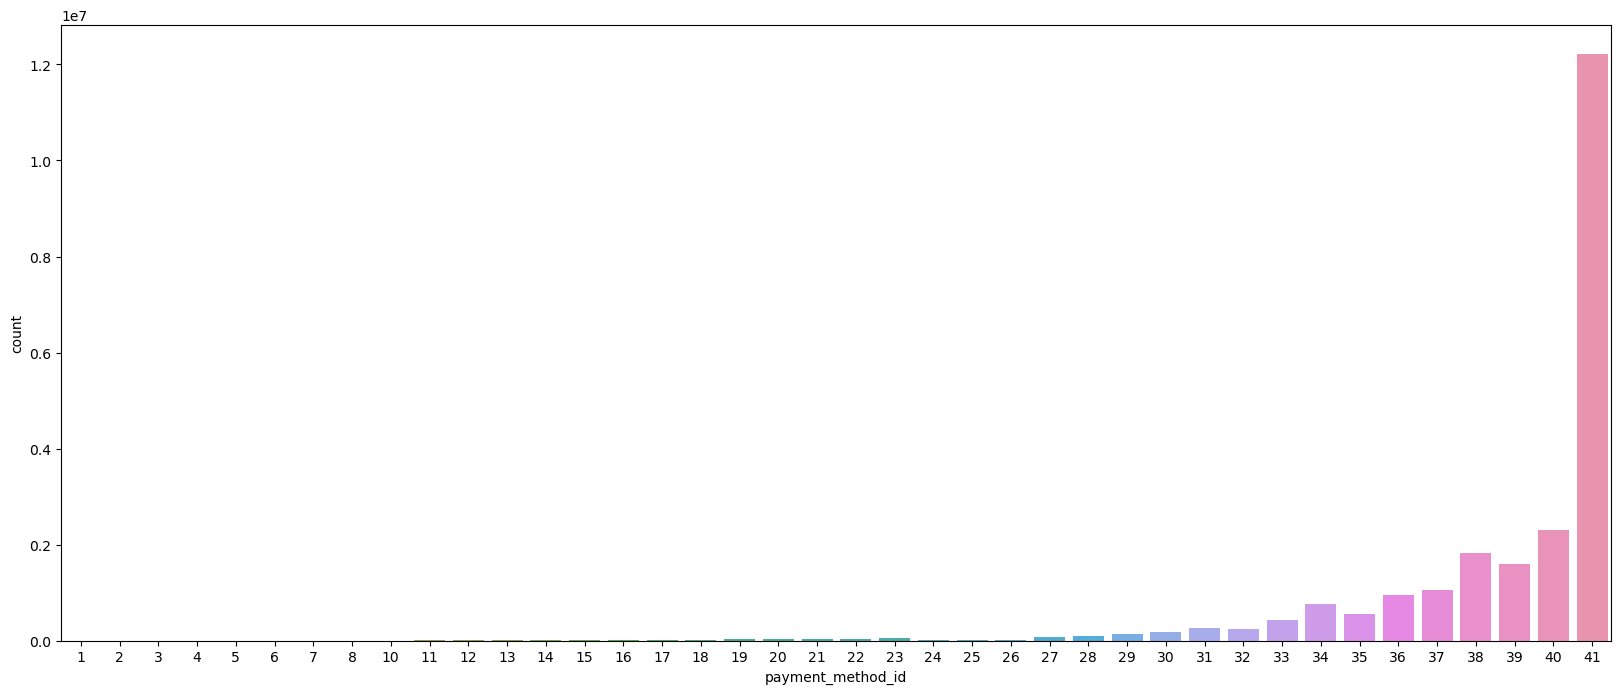

In [50]:
plt.figure(figsize=(20, 8))
sns.countplot(x='payment_method_id',data=transaction)
plt.show()

41 payment method is used offen

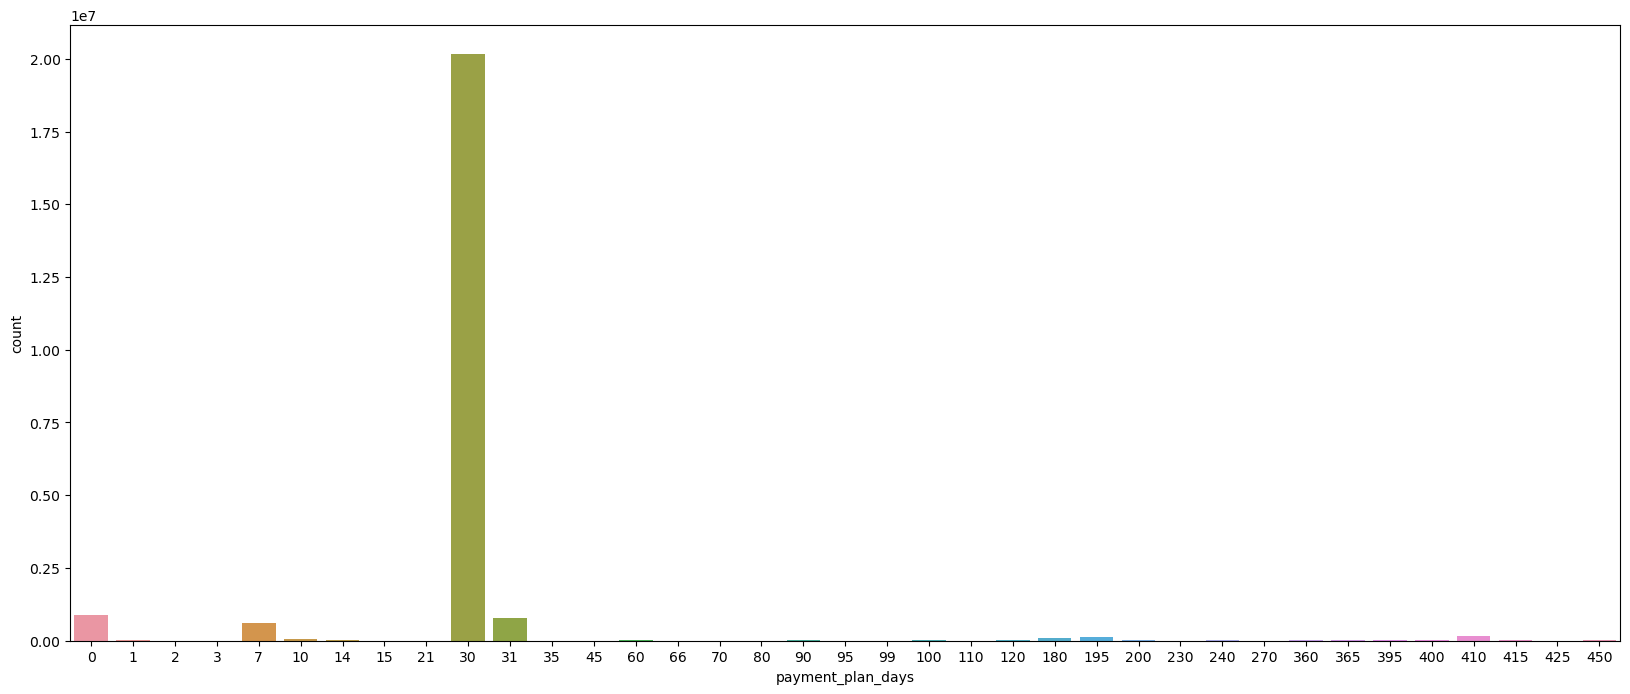

In [52]:
plt.figure(figsize=(20, 8))
sns.countplot(x='payment_plan_days',data=transaction)
plt.show()

mostly 30 days

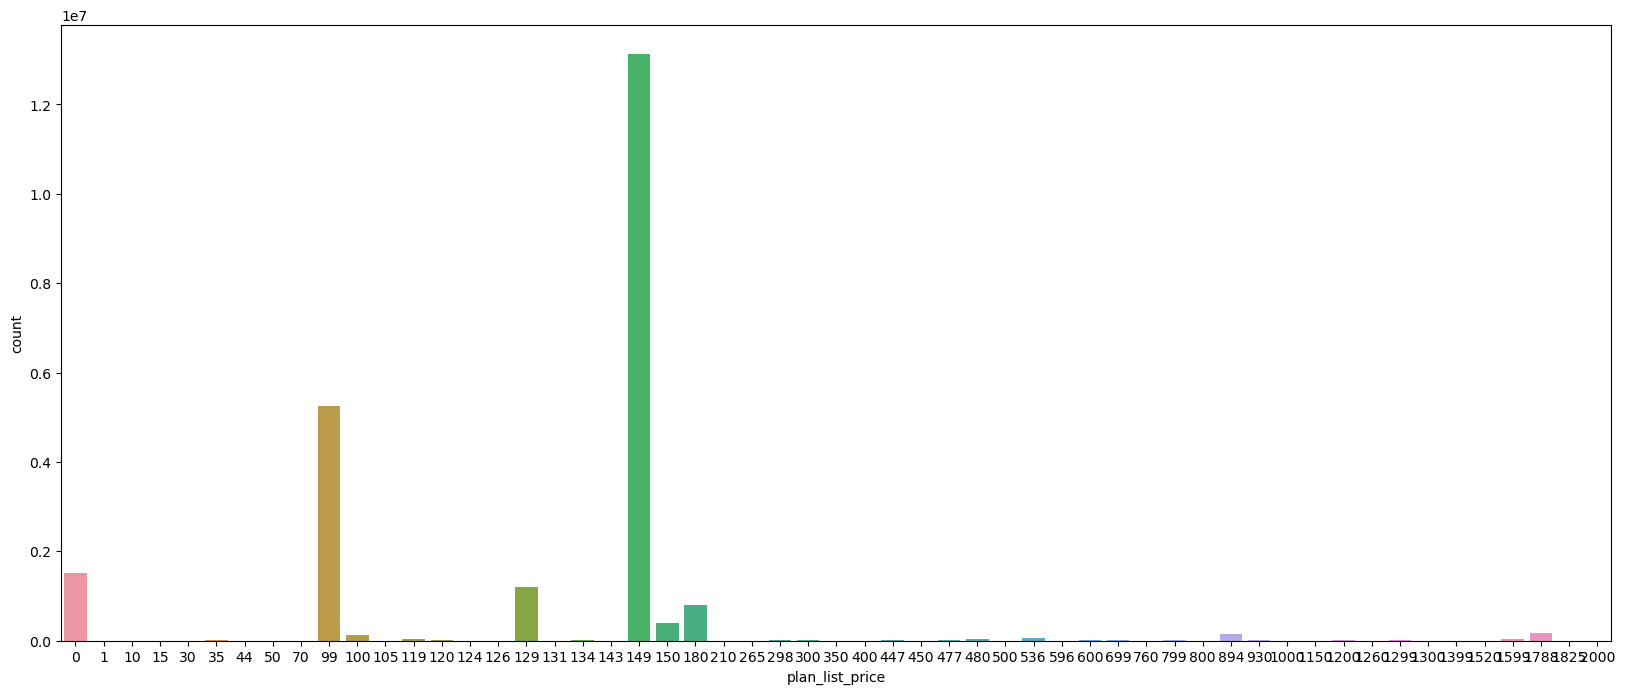

In [53]:
plt.figure(figsize=(20, 8))
sns.countplot(x='plan_list_price',data=transaction)
plt.show()

price plan is mostly - 99,129,149,180

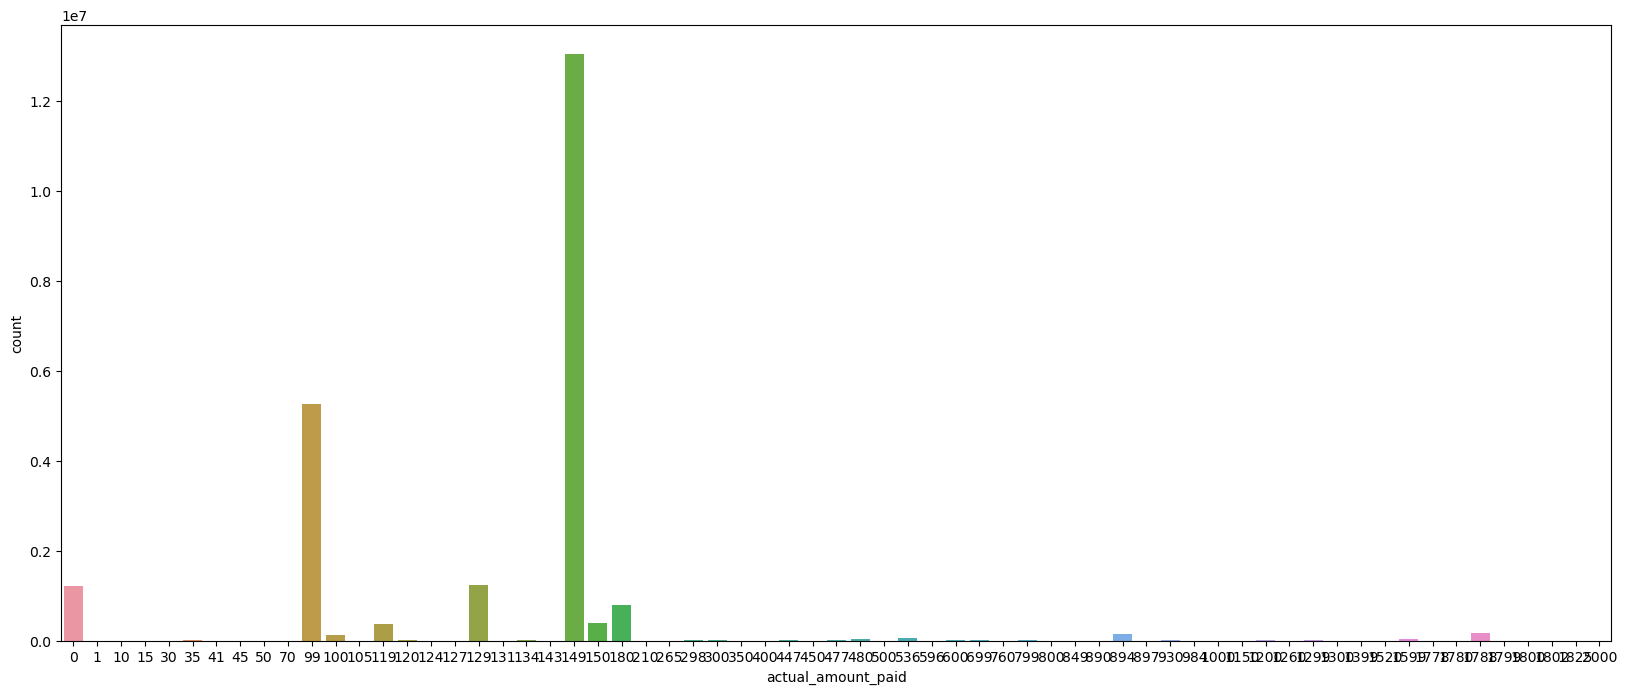

In [54]:
plt.figure(figsize=(20, 8))
sns.countplot(x='actual_amount_paid',data=transaction)
plt.show()

price plan and actual amt seems same for most of the values except very few. 149 being the max.

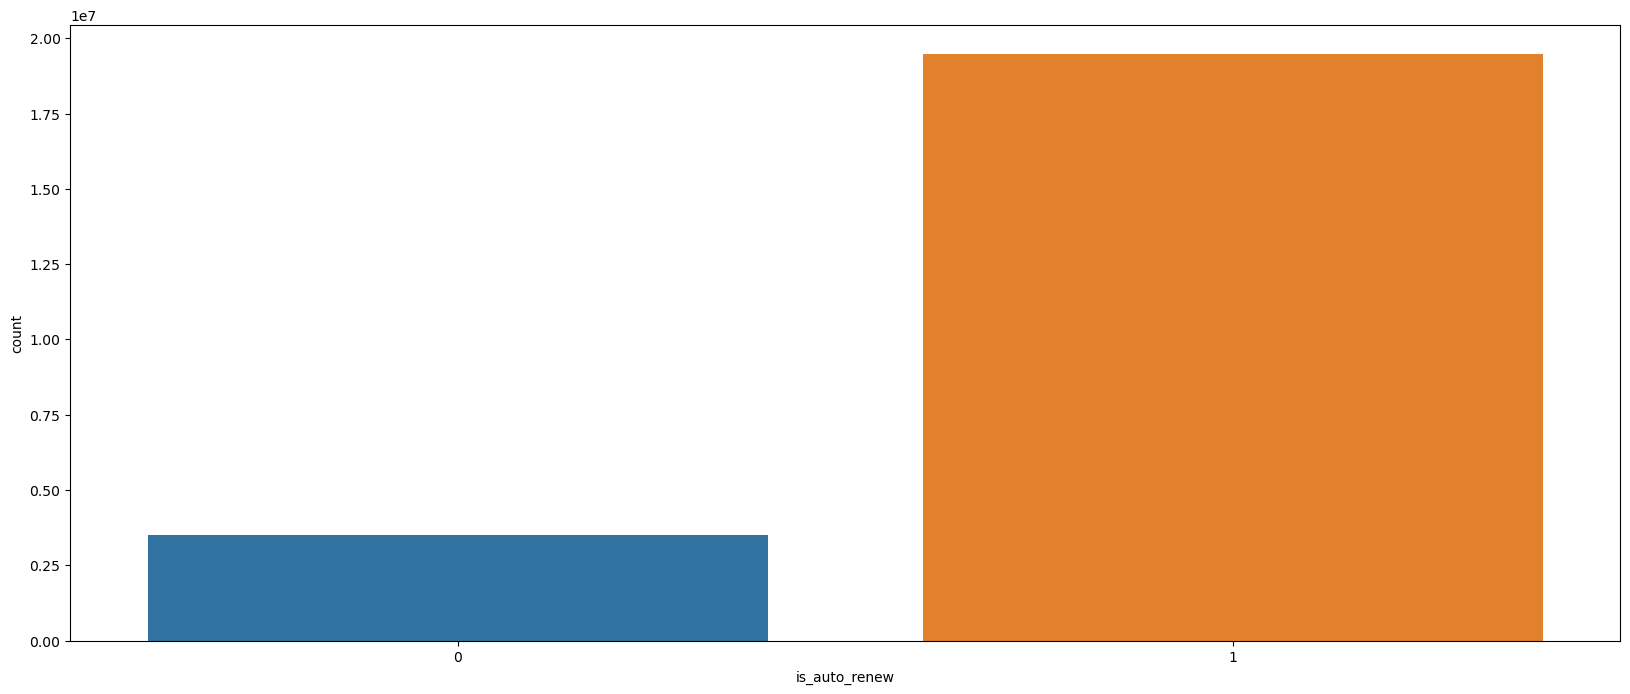

In [55]:
plt.figure(figsize=(20, 8))
sns.countplot(x='is_auto_renew',data=transaction)
plt.show()

many are auto renew users

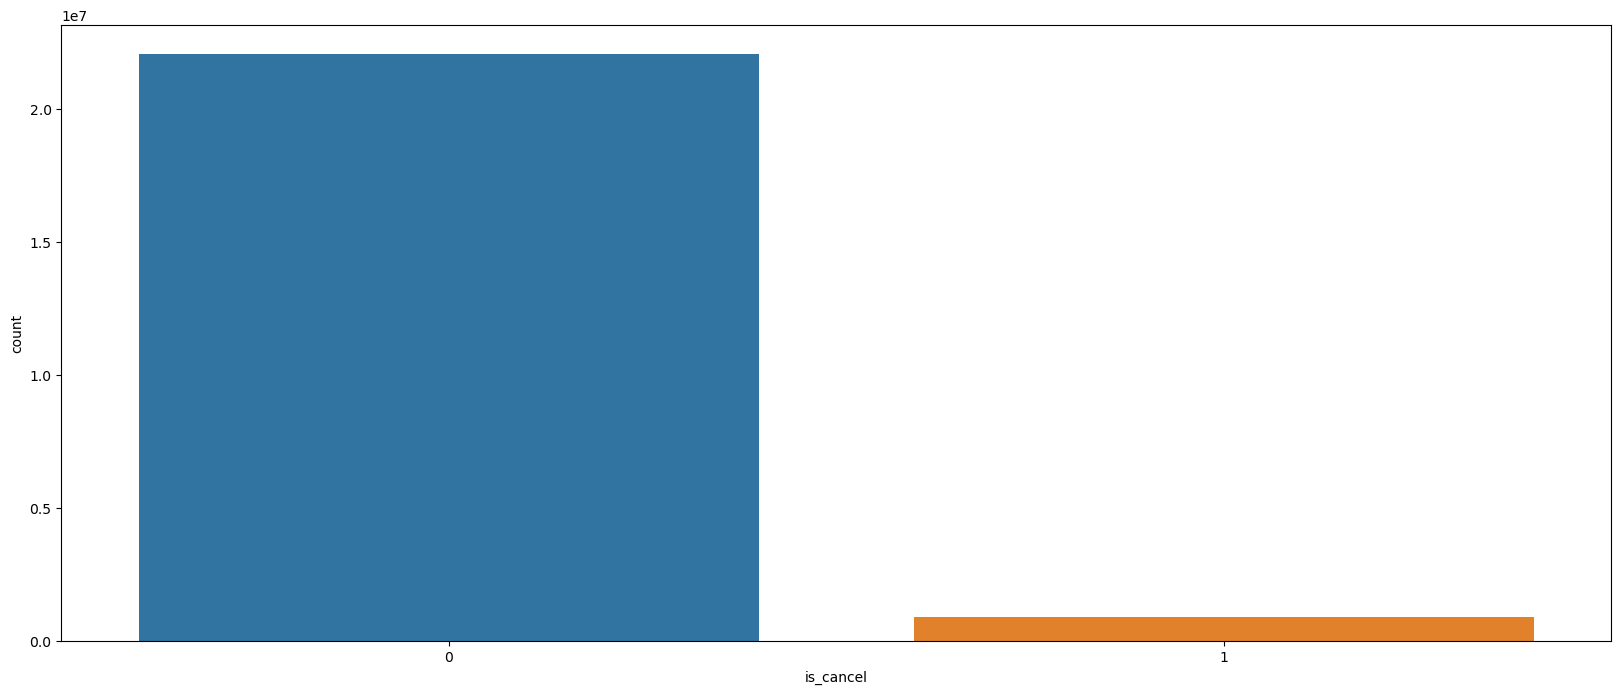

In [56]:
plt.figure(figsize=(20, 8))
sns.countplot(x='is_cancel',data=transaction)
plt.show()

is_cancel is low

In [58]:
transaction['transaction_date'].max() 

Timestamp('2017-03-31 00:00:00')

In [59]:
transaction['transaction_date'].min() 

Timestamp('2015-01-01 00:00:00')